In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('fifa_2023.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79
1,Lionel Messi,98,team-of-the-year,RW,Argentina,Ligue 1 Uber Eats,Paris SG,93,98,97,99,40,77
2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76
3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94
4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95


# Step 1: Data Cleaning

In [4]:
# Are there any duplicate rows in the data?

df[df.duplicated()] #yes

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
508,Oleksandr Zinchenko,90,fut-birthday,LB,Ukraine,Premier League,Arsenal,90,78,89,90,87,81
670,Darwin Núñez,89,fut-birthday,LW,Uruguay,Premier League,Liverpool,95,88,77,86,48,92
841,Mattéo Guendouzi,88,fut-birthday,CM,France,Ligue 1 Uber Eats,OM,83,82,87,84,86,89
848,Koke,88,fut-birthday,CM,Spain,LaLiga Santander,Atlético de Madrid,80,81,90,85,83,84
944,Diogo Dalot,88,world-cup-team-of-the-tournament,RB,Portugal,Premier League,Manchester Utd,89,73,85,88,85,87
1063,Matteo Pessina,87,fut-birthday,CAM,Italy,Serie A TIM,AC Monza,86,84,86,88,81,81
1203,Ciro Immobile,87,team-of-the-week,ST,Italy,Serie A TIM,Latium,86,88,70,81,40,77
1321,Joakim Mæhle,86,fut-birthday,RWB,Denmark,Serie A TIM,Bergamo Calcio,94,70,82,85,82,86
1437,Kieran Trippier,86,team-of-the-week,RB,England,Premier League,Newcastle Utd,73,66,84,80,82,75
1450,Theo Hernández,86,team-of-the-week,LB,France,Serie A TIM,Milan,94,73,78,82,80,84


In [5]:
df = df.drop_duplicates(ignore_index=True)
df.duplicated().value_counts()

False    9986
Name: count, dtype: int64

In [6]:
# Are there any null or missing values

df.isnull().sum()

#379 null values in the leauge column and 350 null values in the team column

name           0
rating         0
card_type      0
position       0
nation         0
league       379
team         350
PAC            0
SHO            0
PAS            0
DRI            0
DEF            0
PHY            0
dtype: int64

In [7]:
df = df.dropna(how='any') #drop the rows that have nan values
df.isna().sum()

name         0
rating       0
card_type    0
position     0
nation       0
league       0
team         0
PAC          0
SHO          0
PAS          0
DRI          0
DEF          0
PHY          0
dtype: int64

In [8]:
# Are there any outliers in numeric columns that should be investigated?

df.loc[:, 'PAC':'PHY'].describe().loc[['mean', 'min', 'max', '50%']]

,PAC,SHO,PAS,DRI,DEF,PHY
mean,74.210576,63.848652,68.391902,72.905173,59.206932,72.579994
min,29.000000,18.000000,36.000000,35.000000,17.000000,34.000000
max,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000
50%,75.000000,66.000000,68.000000,72.000000,64.000000,73.000000


In [9]:
# detecting outliers using z-score method

z_low, z_high = -3, 3
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    col_z = (df[col] - col_mean) / col_std #df[col] - col_mean will return a series with each entry of the series subtracted col_mean from it

    high_outliers = col_z[col_z > z_high]
    low_outliers = col_z[col_z < z_low]

    print(f"{len(high_outliers)} high outliers and {len(low_outliers)} low outliers in {col} column")


0 high outliers and 0 low outliers in rating column
0 high outliers and 88 low outliers in PAC column
0 high outliers and 0 low outliers in SHO column
0 high outliers and 1 low outliers in PAS column
0 high outliers and 25 low outliers in DRI column
0 high outliers and 0 low outliers in DEF column
0 high outliers and 41 low outliers in PHY column


# Step 2: Data Analysis

## What is the distribution of player ratings? Generate a histogram.


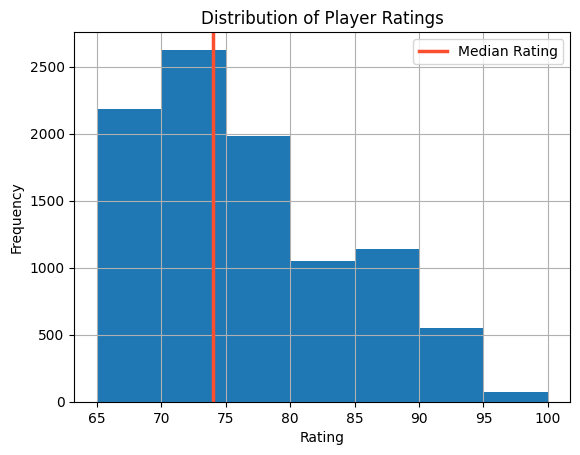

In [10]:
bins = [i for i in range(65, 101, 5)]
df['rating'].hist(bins=bins)

median = df['rating'].median()
plt.axvline(median, color='#fc4f30', linewidth=2.5, label='Median Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings')
plt.legend()
plt.show()

# Which positions have the highest rated players on average? Generate a bar chart.


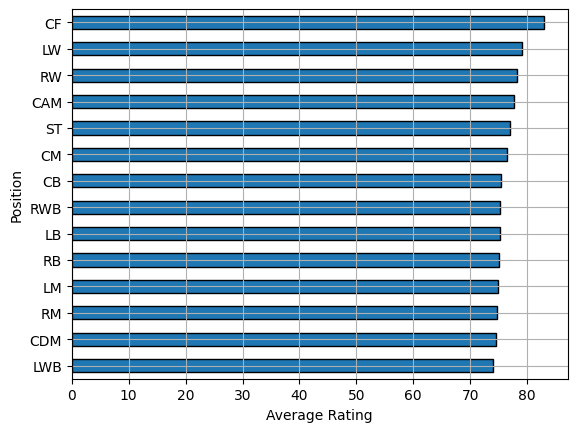

In [11]:
df.groupby('position')['rating'].mean().sort_values().plot(kind='barh', grid=True, edgecolor='black', rot=0)
plt.xlabel('Average Rating')
plt.ylabel('Position')
plt.show()

# Which leagues have the highest rated players on average? Generate a bar chart.


In [12]:
dist = df.groupby('league')['rating'].mean()
dist.idxmax(), dist.max()

('Icons', 89.85526315789474)

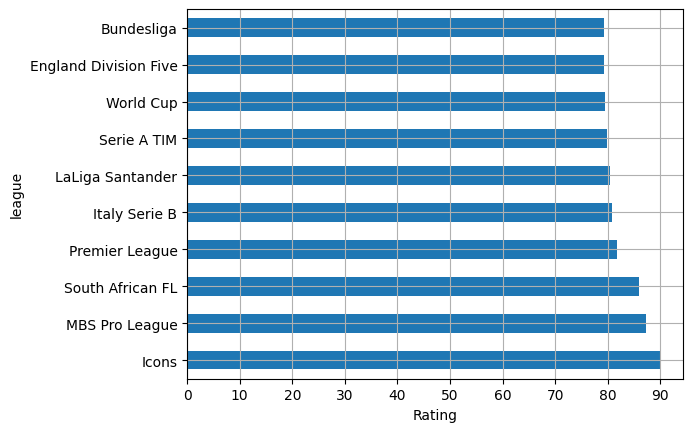

In [13]:
dist.sort_values(ascending=False)[:10].plot(kind='barh', grid=True)
plt.xlabel('Rating')
plt.xticks(list(range(0, 91, 10)))
plt.show()

# What is the correlation between physical attributes (PHY, PAC, DRI) and
# player rating?


In [14]:
PAC_corr = df['PAC'].corr(df['rating'])
PHY_corr = df['PHY'].corr(df['rating'])
DRI_corr = df['DRI'].corr(df['rating'])

# How do shooting (SHO) and passing (PAS) attributes differ by position? Generate bar plots.

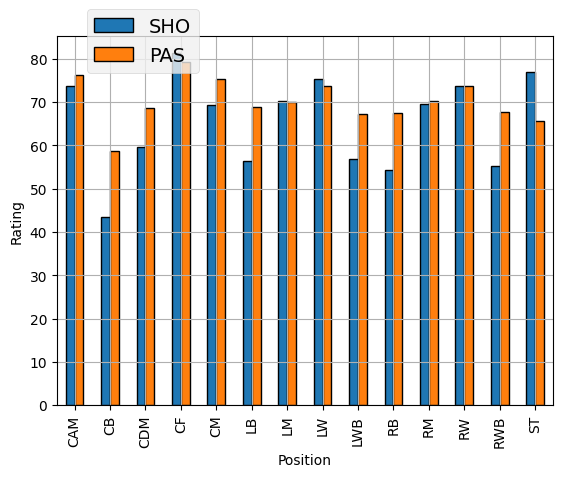

In [15]:
mean_pos = df.groupby('position')[['SHO', 'PAS']].mean()

mean_pos.plot.bar(grid=True, edgecolor='black', linewidth=1)
plt.style.use('fivethirtyeight')
plt.legend(loc=(.06, .9))
plt.xlabel('Position')
plt.ylabel('Rating')
plt.title('')
plt.show()

# Which players have the highest combined physical attributes (PHY + PAC + DRI)? Show top 20 in a histogram.

In [16]:
df['combined_attr'] = df['PAC'] + df['PHY'] + df['DRI']
top20 = df.sort_values(by='combined_attr', ascending=False).drop_duplicates(subset='name')[:21]
top20

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY,combined_attr
4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95,288
9,Rafael Leão,97,team-of-the-season,LW,Portugal,Serie A TIM,Milan,99,93,89,98,40,91,288
186,Craig Goodwin,92,team-of-the-season,LM,Australia,A-League,Adelaide United,98,88,88,94,78,92,284
23,Kylian Mbappé,97,team-of-the-year,ST,France,Ligue 1 Uber Eats,Paris SG,99,96,88,98,44,87,284
53,Marcus Rashford,95,team-of-the-season,LW,England,Premier League,Manchester Utd,99,95,92,95,56,89,283
46,Alexandre Lacazette,95,team-of-the-season,ST,France,Ligue 1 Uber Eats,OL,96,92,92,95,56,92,283
124,Enner Valencia,93,team-of-the-season,ST,Ecuador,Süper Lig,Fenerbahçe,99,91,83,91,63,93,283
446,Georges Mikautadze,90,team-of-the-season,ST,Georgia,Ligue 2 BKT,FC Metz,97,91,89,95,60,91,283
202,Renato Sanches,92,team-of-the-season-moments,CM,Portugal,Ligue 1 Uber Eats,Paris SG,93,90,90,95,86,95,283
16,Jude Bellingham,97,team-of-the-season,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94,282


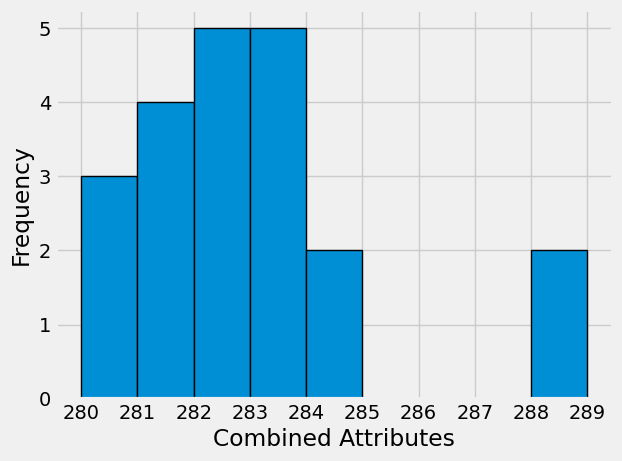

In [17]:
bins = list(range(280, 290))


plt.hist(top20['combined_attr'], bins=bins, edgecolor='black', linewidth=1)
plt.xticks(bins)
plt.xlabel('Combined Attributes')
plt.ylabel('Frequency')
plt.show()

# What percentage of players fall into each individual attribute score bracket (ex: PAC 90-95, 96-99)?

In [90]:

temp_df = df[df['rating'] >= 90].copy()  # Create a copy of the filtered dataframe
temp_df = temp_df.drop_duplicates(subset='name')

bins = [90, 95, 99]
labels = ['90-95', '95-99']

temp_df['rating_range'] = pd.cut(temp_df['rating'], bins=bins, labels=labels, right=False)
temp_df

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY,combined_attr,rating_range
0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79,272,95-99
2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76,267,95-99
3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94,282,95-99
4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95,288,95-99
5,Robert Lewandowski,97,award-winner,ST,Poland,LaLiga Santander,FC Barcelona,90,99,86,93,51,90,273,95-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Jadon Sancho,90,winter-wildcards,CAM,England,Premier League,Manchester Utd,87,83,88,92,40,71,250,90-95
565,Bruno Fernandes,90,world-cup-stories,CAM,Portugal,Premier League,Manchester Utd,80,89,91,85,71,80,245,90-95
577,Franck Ribéry,90,premium-squad-building-challenge,LW,France,Serie A TIM,Salernitana,89,85,86,90,35,70,249,90-95
578,Marcelo Brozović,90,world-cup-path-to-glory,CDM,Croatia,Serie A TIM,Inter,79,83,87,87,88,84,250,90-95


In [93]:
temp_df['rating_range'].value_counts(normalize=True) * 100

rating_range
90-95    86.756757
95-99    13.243243
Name: proportion, dtype: float64

# Which clubs have the most players in the data set? Show top 10 in a bar chart.

In [118]:
counts = df['team'].value_counts()[2:20]
counts

team
Real Madrid           71
Manchester Utd        70
Manchester City       69
Paris SG              66
Arsenal               66
Milan                 64
FC Barcelona          64
FC Bayern München     64
Borussia Dortmund     61
Chelsea               61
Liverpool             57
Atlético de Madrid    53
Inter                 52
Spurs                 48
Japan                 48
Sevilla FC            46
Ecuador               46
Newcastle Utd         46
Name: count, dtype: int64

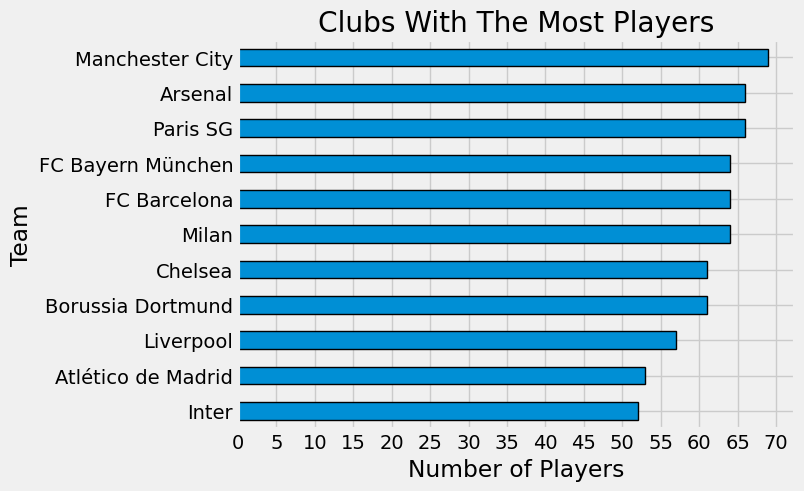

In [124]:
counts[2:13].sort_values().plot(kind='barh', edgecolor='black', linewidth=1)
plt.xticks(list(range(0, 72, 5)))
plt.ylabel('Team')
plt.xlabel('Number of Players')
plt.title('Clubs With The Most Players')
plt.show()



What is the distribution of player ratings by league? Generate histograms.

How does shooting vary by position? Generate a box plot.

Which leagues have the most physically fit players on average? Generate a bar chart.

Which players have the highest shooting attributes? Show top 10 in a table.

What is the correlation between defensive (DEF) and physical (PHY) attributes? Generate a scatter plot.

Which players have the highest passing attributes? Show top 20 in a table.

What is the distribution of dribbling attributes by position? Generate box plots.

Which icons have the highest overall ratings? Show top 10 in a bar chart.

What is the average rating of players from each nation? Show top 10 in a bar chart.



What is the range of physical attribute scores (PAC, DEF, PHY) for each position? Are certain positions associated with higher or lower attribute scores?

Which players have the highest shooting (SHO) attribute scores? How do they compare across positions?

Plot the distribution of players by card type. Which card types have the most players?

Create a heatmap showing the correlation between different attribute scores (PAC, SHO, PAS, etc.). Which attributes tend to go together?

Create a scatter plot showing player rating vs age. Is there a relationship between age and rating?

Which icon players have the highest ratings? How do they compare to non-icon players?

Visualize the top 10 players by each individual attribute score (PAC, SHO, PAS, etc.).

Which teams (leagues) have the most players represented in the dataset?

Plot a bar chart showing the average player rating by nation. Which nations have the highest rated players?

What is the average player rating for forwards vs midfielders vs defenders?


Plot a scatter plot showing shooting attribute (SHO) vs physical attribute (PHY) scores. Do certain combinations occur more often?


Visualize the distribution of players by age. What portion of players fall into each age bracket (18-23, 24-29, 30-35, etc.)?

Plot the number of players represented in the data set by year. Is the number of players increasing each year?

What is the average rating for players belonging to each individual nation?